In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:/Users/User/Downloads/train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
round((df.isnull().sum()),2)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
df1=df.drop(columns=['Cabin'])
df1.fillna({'Age':df1['Age'].mean()},inplace=True)
df1.dropna(subset=['Embarked'],inplace=True)
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
num_col=[col for col in df1.columns if df1[col].dtype!='object']
var_col=[col for col in df1.columns if df1[col].dtype=='object']
print(num_col)
print(var_col)


['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Embarked']


{'whiskers': [<matplotlib.lines.Line2D at 0x26e8786d1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26e8786e4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26e8786c990>],
 'medians': [<matplotlib.lines.Line2D at 0x26e8786f7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26e8785d710>],
 'means': []}

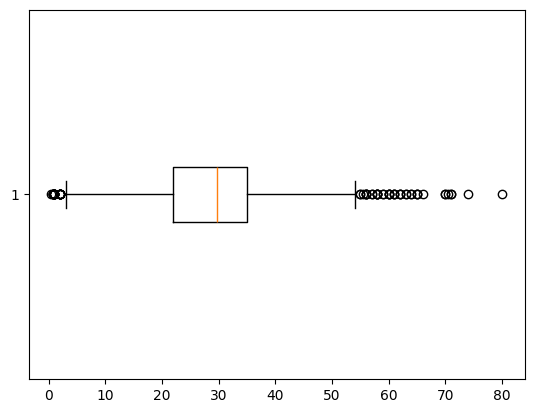

In [31]:
import matplotlib.pyplot as plt
plt.boxplot(df1['Age'],vert=False)

In [36]:
Q1=df1['Age'].quantile(0.25)
Q3=df1['Age'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)
df_clean=df1[(df1['Age']>lower_bound)&(df1['Age']<upper_bound)]

2.5
54.5


In [38]:
#checking if any outliers are to be filtered
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaled_df=df1.copy()
scaler=MinMaxScaler()
scaled_df[num_col]=scaler.fit_transform(df1[num_col])
scaled_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.000000,0.0,1.0,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.0,A/5 21171,0.014151,S
1,0.001124,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.0,PC 17599,0.139136,C
2,0.002247,1.0,1.0,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.0,STON/O2. 3101282,0.015469,S
3,0.003371,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.0,113803,0.103644,S
4,0.004494,0.0,1.0,"Allen, Mr. William Henry",male,0.434531,0.000,0.0,373450,0.015713,S


In [65]:
#Normalization
from sklearn.preprocessing import Normalizer
scaler1=Normalizer()
scaled_data=df1.copy()
scaled_data[num_col]=scaler1.fit_transform(df1[num_col])
scaled_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.042735,0.000000,0.128205,"Braund, Mr. Owen Harris",male,0.940169,0.042735,0.0,A/5 21171,0.309828,S
1,0.024746,0.012373,0.012373,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.470165,0.012373,0.0,PC 17599,0.881971,C
2,0.108979,0.036326,0.108979,"Heikkinen, Miss. Laina",female,0.944484,0.000000,0.0,STON/O2. 3101282,0.287886,S
3,0.062749,0.015687,0.015687,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.549050,0.015687,0.0,113803,0.832988,S
4,0.137423,0.000000,0.082454,"Allen, Mr. William Henry",male,0.961959,0.000000,0.0,373450,0.221251,S


In [66]:
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
df_copy2=df1.copy()
df_copy2[num_col]=scaler2.fit_transform(df1[num_col])
df_copy2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.732505,-0.786961,0.825209,"Braund, Mr. Owen Harris",male,-0.590495,0.431350,-0.474326,A/5 21171,-0.500240,S
1,-1.728611,1.270711,-1.572211,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.643971,0.431350,-0.474326,PC 17599,0.788947,C
2,-1.724718,1.270711,0.825209,"Heikkinen, Miss. Laina",female,-0.281878,-0.475199,-0.474326,STON/O2. 3101282,-0.486650,S
3,-1.720825,1.270711,-1.572211,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.412509,0.431350,-0.474326,113803,0.422861,S
4,-1.716931,-0.786961,0.825209,"Allen, Mr. William Henry",male,0.412509,-0.475199,-0.474326,373450,-0.484133,S


In [ ]:
#Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler3=RobustScaler()
df_copy3=df1.copy()
df_copy3[num_col]=scaler3.fit_transform(df1[num_col])
df_copy3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.002252,0.0,0.0,"Braund, Mr. Owen Harris",male,-0.592240,1.0,0.0,A/5 21171,-0.311813,S
1,-1.000000,1.0,-2.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638529,1.0,0.0,PC 17599,2.459687,C
2,-0.997748,1.0,0.0,"Heikkinen, Miss. Laina",female,-0.284548,0.0,0.0,STON/O2. 3101282,-0.282598,S
3,-0.995495,1.0,-2.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407760,1.0,0.0,113803,1.672674,S
4,-0.993243,0.0,0.0,"Allen, Mr. William Henry",male,0.407760,0.0,0.0,373450,-0.277188,S
